In [0]:
import tensorflow as tf
import os

from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

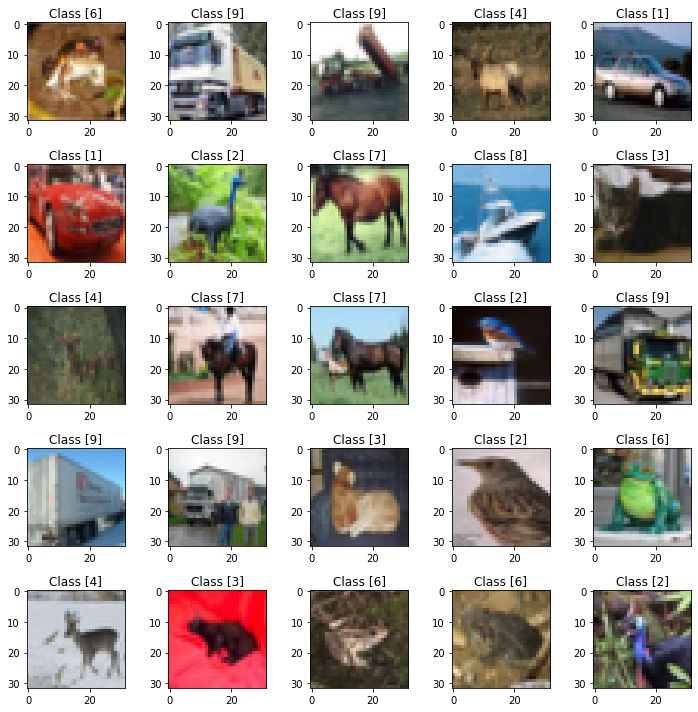

In [0]:
fig = plt.figure(figsize=(10, 10))
for idx in range(25):
  plt.subplot(5,5,idx+1)
  plt.imshow(X_train[idx], cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[idx]))
  
plt.tight_layout()

In [0]:
#preparing the data to 4th dimension
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

num_channels = 3
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)
input_shape = (img_rows, img_cols, num_channels)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
#normalizing the values
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [0]:
#checking the data after normalizing
X_train.max()

1.0

In [0]:
X_test.max()

1.0

In [0]:
#because the y_train has two dimension we have to reshape it
y_train.shape

(50000, 1)

In [0]:
#after reshaping
y_train.reshape(-1).shape

(50000,)

In [0]:
if len(y_train.shape) == 2:
  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)
  
if len(y_train.shape) == 1:
  num_classes = len(set(y_train))
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

In [0]:
y_train.shape, y_test.shape, num_classes

((50000, 10), (10000, 10), 10)

In [0]:
#now we define our web

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(), #bridge between conv layers and full conected layers
    
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
#now we train our model
model.fit(X_train, y_train,
    epochs=2,
    batch_size=256,
    verbose=2,
    validation_data=(X_test, y_test))

Epoch 1/2
196/196 - 3s - loss: 1.6463 - accuracy: 0.3979 - val_loss: 1.3905 - val_accuracy: 0.5056
Epoch 2/2
196/196 - 3s - loss: 1.3057 - accuracy: 0.5338 - val_loss: 1.1665 - val_accuracy: 0.5951


In [0]:
#we make our model more advenced
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train,
    epochs=10,
    batch_size=256,
    verbose=2,
    validation_data=(X_test, y_test))

Epoch 1/10
196/196 - 5s - loss: 1.8882 - accuracy: 0.2802 - val_loss: 1.6220 - val_accuracy: 0.3966
Epoch 2/10
196/196 - 4s - loss: 1.5184 - accuracy: 0.4381 - val_loss: 1.3547 - val_accuracy: 0.5059
Epoch 3/10
196/196 - 4s - loss: 1.3481 - accuracy: 0.5114 - val_loss: 1.2197 - val_accuracy: 0.5609
Epoch 4/10
196/196 - 4s - loss: 1.2422 - accuracy: 0.5539 - val_loss: 1.1756 - val_accuracy: 0.5737
Epoch 5/10
196/196 - 4s - loss: 1.1659 - accuracy: 0.5854 - val_loss: 1.2053 - val_accuracy: 0.5806
Epoch 6/10
196/196 - 4s - loss: 1.1052 - accuracy: 0.6074 - val_loss: 1.0332 - val_accuracy: 0.6268
Epoch 7/10
196/196 - 4s - loss: 1.0487 - accuracy: 0.6268 - val_loss: 0.9843 - val_accuracy: 0.6558
Epoch 8/10
196/196 - 4s - loss: 1.0014 - accuracy: 0.6462 - val_loss: 1.0007 - val_accuracy: 0.6470
Epoch 9/10
196/196 - 4s - loss: 0.9631 - accuracy: 0.6621 - val_loss: 0.8921 - val_accuracy: 0.6848
Epoch 10/10
196/196 - 4s - loss: 0.9472 - accuracy: 0.6662 - val_loss: 0.8972 - val_accuracy: 0.6858

In [0]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8953 - accuracy: 0.6858


[0.8952875733375549, 0.6858000159263611]